In [2]:
#Include libraries
import numpy as np
from hmmlearn import hmm
import copy
from collections import defaultdict
from sklearn.metrics import confusion_matrix
import warnings
import os
import glob
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
#Function that trains the HMM
def GHMM_train(dataset, states = 4, trials = 10,cov = "diag",max_iter=1000, randomSeed = 100, min_cov = 1e-3):
    rndNum = 10
    prob = -np.inf
    best_g = None
    score = 0
    np.random.seed(randomSeed)
    random_state = np.random.random(trials)
    for i in range(len(random_state)):
        state = int(random_state[i]*1000)
        g = hmm.GaussianHMM(n_components=states, covariance_type = cov, n_iter=max_iter, min_covar = min_cov)
        g.fit(dataset)
        score = g.score(dataset)
        if score > prob:
            prob = score
            best_g = copy.deepcopy(g)
    return best_g

In [4]:
#function that evaluates the HMM
def GHMM_evaluate(testset, GMMmodel):
    #test set is a list of sets of name-date collections
    #GMMmodel is a dictionary of test data
    truth = []
    pred = []
    for dataset in testset:
        truth.append(dataset[0])
        test_score = -np.inf
        pred_name = None
        for modelName, model in GMMmodel.items():
            score = model.score(dataset[1])
            if score > test_score:
                test_score = score
                pred_name = modelName
        pred.append(pred_name)
    label = []
    for item in truth:
        if item not in label:
            label.append(item)
    matrix = confusion_matrix(truth, pred, labels=label)
    print ("truth: ",truth)
    print ("prediction: ", pred)
    print ("item order in table", label)
    return matrix,truth,pred

In [5]:
f_dir = "/home/apurv/Desktop/Term_Project"
os.chdir(f_dir)
train_list=[]
for folder in os.listdir(f_dir):
    if folder=='trained':
        os.chdir("/home/apurv/Desktop/Term_Project/trained")
        for file in os.listdir(os.getcwd()):
            train=np.load(file)
            amp_freq = [[x[0],x[1]] for x in train]
            label=file[:-10]
            train_list.append((label,amp_freq))
            print(label)
#print(train_list)

Common_Whitethroat1
Red_legged_Seriema1
Black_Hawk_Eagle1
Red_winged_Blackbird1
Mourning_Dove1
Sedge_Wren1
Mallard1


In [6]:
modelDict = dict()
for dataset in train_list:
    model = GHMM_train(dataset = dataset[1], states = 17, trials = 1,cov = "diag",max_iter=100, randomSeed = 120, min_cov = 1e-5)
    modelDict[dataset[0]] = model

In [7]:
f_dir = "/home/apurv/Desktop/Term_Project"
os.chdir(f_dir)
test_list=[]
for folder in os.listdir(f_dir):
    if folder=='testing':
        os.chdir("/home/apurv/Desktop/Term_Project/testing")
        for file in os.listdir(os.getcwd()):
            test=np.load(file)
            amp_freq = [[x[0],x[1]] for x in test]
            label=file[:-5]
            test_list.append((label,amp_freq))
            print(label)

Mourning_Dove1
Red_legged_Seriema1
Mallard1
Common_Whitethroat1
Sedge_Wren1
Common_Whitethroat1
Mallard1
Black_Hawk_Eagle1
Red_winged_Blackbird1
Red_winged_Blackbird1
Black_Hawk_Eagle1
Red_legged_Seriema1
Sedge_Wren1
Mourning_Dove1


In [8]:
GHMM_evaluate(test_list,modelDict)

truth:  ['Mourning_Dove1', 'Red_legged_Seriema1', 'Mallard1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Common_Whitethroat1', 'Mallard1', 'Black_Hawk_Eagle1', 'Red_winged_Blackbird1', 'Red_winged_Blackbird1', 'Black_Hawk_Eagle1', 'Red_legged_Seriema1', 'Sedge_Wren1', 'Mourning_Dove1']
prediction:  ['Mourning_Dove1', 'Red_legged_Seriema1', 'Red_legged_Seriema1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Common_Whitethroat1', 'Mallard1', 'Black_Hawk_Eagle1', 'Red_winged_Blackbird1', 'Red_legged_Seriema1', 'Red_winged_Blackbird1', 'Red_legged_Seriema1', 'Sedge_Wren1', 'Mourning_Dove1']
item order in table ['Mourning_Dove1', 'Red_legged_Seriema1', 'Mallard1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Black_Hawk_Eagle1', 'Red_winged_Blackbird1']


(array([[2, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0],
        [0, 0, 0, 0, 2, 0, 0],
        [0, 0, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 1]]),
 ['Mourning_Dove1',
  'Red_legged_Seriema1',
  'Mallard1',
  'Common_Whitethroat1',
  'Sedge_Wren1',
  'Common_Whitethroat1',
  'Mallard1',
  'Black_Hawk_Eagle1',
  'Red_winged_Blackbird1',
  'Red_winged_Blackbird1',
  'Black_Hawk_Eagle1',
  'Red_legged_Seriema1',
  'Sedge_Wren1',
  'Mourning_Dove1'],
 ['Mourning_Dove1',
  'Red_legged_Seriema1',
  'Red_legged_Seriema1',
  'Common_Whitethroat1',
  'Sedge_Wren1',
  'Common_Whitethroat1',
  'Mallard1',
  'Black_Hawk_Eagle1',
  'Red_winged_Blackbird1',
  'Red_legged_Seriema1',
  'Red_winged_Blackbird1',
  'Red_legged_Seriema1',
  'Sedge_Wren1',
  'Mourning_Dove1'])

In [12]:
f_dir = "/home/apurv/Desktop/Term_Project"
os.chdir(f_dir)
test_list=[]
count=0
for folder in os.listdir(f_dir):
    if folder=='testing':
        os.chdir("/home/apurv/Desktop/Term_Project/testing")
        for file in os.listdir(os.getcwd()):
            if count == 0:
                test=np.load(file)
                amp_freq = [[x[0],x[1]] for x in test]
                label=file[:-5]
                test_list.append((label,amp_freq))
                print(label)
            count+=1

Mourning_Dove1


truth:  ['Mourning_Dove1']
prediction:  ['Mourning_Dove1']
item order in table ['Mourning_Dove1']
[[1]]
prediceted bird image


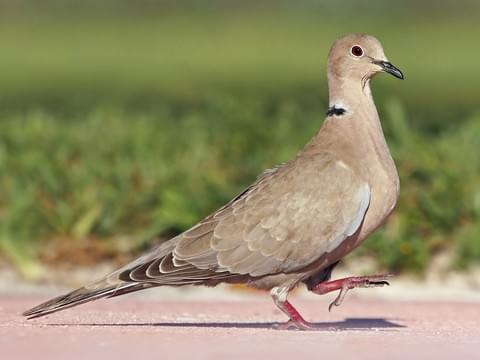

In [13]:
from IPython.display import Image
from IPython.core.display import HTML
cf,t,pred=GHMM_evaluate(test_list,modelDict)
print(cf)
print('prediceted bird image')
Image(filename='/home/apurv/Desktop/Term_Project/img/'+pred[0]+'.jpg',width=300, height=300)

actual testing bird image


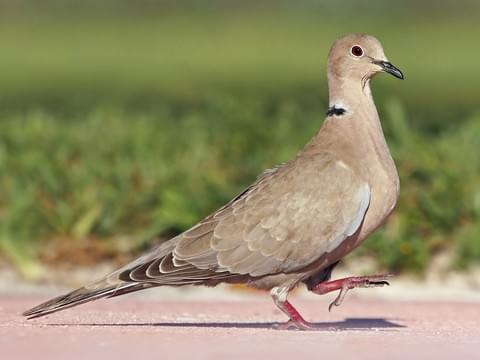

In [14]:
print('actual testing bird image')
Image(filename='/home/apurv/Desktop/Term_Project/img/'+t[0]+'.jpg',width=300, height=300)

In [8]:
accuracy=[]
for i in range(2,20):
    modelDict = dict()
    print('ITER === ',i)
    for dataset in train_list:
        model = GHMM_train(dataset = dataset[1], states = i, trials = 1,cov = "diag",max_iter=100, randomSeed = 120, min_cov = 1e-5)
        modelDict[dataset[0]] = model
    cf=GHMM_evaluate(test_list,modelDict)
    acc=0
    for a in range(0,len(cf)):
        acc=acc+cf[a][a]
    print(cf)
    print(acc)
    accuracy.append(acc)
    print()
print(accuracy)

ITER ===  2
truth:  ['Mourning_Dove1', 'Red_legged_Seriema1', 'Mallard1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Common_Whitethroat1', 'Mallard1', 'Black_Hawk_Eagle1', 'Red_winged_Blackbird1', 'Red_winged_Blackbird1', 'Black_Hawk_Eagle1', 'Red_legged_Seriema1', 'Sedge_Wren1', 'Mourning_Dove1']
prediction:  ['Red_winged_Blackbird1', 'Black_Hawk_Eagle1', 'Sedge_Wren1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Sedge_Wren1', 'Red_legged_Seriema1', 'Black_Hawk_Eagle1', 'Sedge_Wren1', 'Red_winged_Blackbird1', 'Red_winged_Blackbird1', 'Red_legged_Seriema1', 'Common_Whitethroat1', 'Mourning_Dove1']
item order in table ['Mourning_Dove1', 'Red_legged_Seriema1', 'Mallard1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Black_Hawk_Eagle1', 'Red_winged_Blackbird1']
[[1 0 0 0 0 0 1]
 [0 1 0 0 0 1 0]
 [0 1 0 0 1 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1]
 [0 0 0 0 1 0 1]]
6

ITER ===  3
truth:  ['Mourning_Dove1', 'Red_legged_Seriema1', 'Mallard1', 'Common_Whitethroat1', 'Sedge_Wren1', 'Common_Whi

KeyboardInterrupt: 